# Linear Algebra for Data Science

## Chapter 4: Vecctor applications

https://github.com/mikexcohen/LinAlg4DataScience/blob/main/LA4DS_ch04.ipynb

### Correlation and cosine similarity

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 4-1
a = np.array([1,2,3])
b = np.array([3,5,9])

def corr_and_cosine(x, y):
    x_bar = x.mean()
    y_bar = y.mean()

    # Cosine
    num = np.dot(x,y)
    den = np.linalg.norm(x) * np.linalg.norm(y)
    cosine_corr = num/den

    # Pearson correlation
    xm = x - x.mean()
    ym = y - y.mean()
    numm = np.dot(xm, ym)
    denm = np.linalg.norm(xm) * np.linalg.norm(ym)
    p = numm /denm

    return p, cosine_corr


print(corr_and_cosine(a, b))
print(np.corrcoef(a,b))




(np.float64(0.9819805060619659), np.float64(0.9968895725584537))
[[1.         0.98198051]
 [0.98198051 1.        ]]


In [42]:
# compare r and c without mean-centering
a = np.random.randn(15) + 10 # note the offset!
b = np.random.randn(15)

# mean-center
aNoMean = a - np.mean(a)
bNoMean = b - np.mean(b)

# show the results with and without mean-centering
print('Without mean-centering (should differ):')
print( np.round(corr_and_cosine(a,b),4) )
print(' ')

print('With mean-centering (should be the same):')
print( np.round(corr_and_cosine(aNoMean,bNoMean),4) )

Without mean-centering (should differ):
[-0.153  -0.1728]
 
With mean-centering (should be the same):
[-0.153 -0.153]


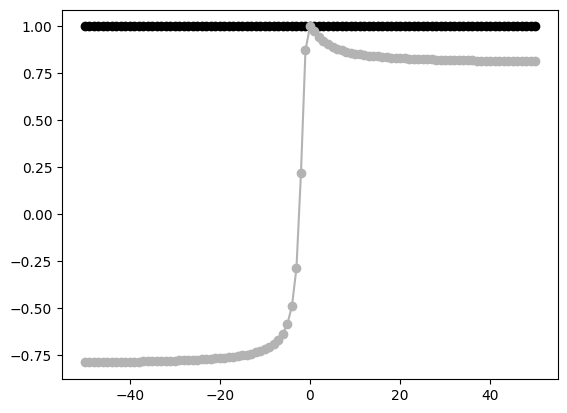

In [53]:
# Exercise 4-2
a = np.arange(4, dtype=float)
offsets = np.arange(-50,51)

# initialize the results
results = np.zeros((len(offsets), 2))

for i in range(len(offsets)):
    b = a + offsets[i]
    results[i, :] = corr_and_cosine(a, b)

h = plt.plot(offsets, results)
h[0].set_color('k')
h[0].set_marker('o')
h[1].set_color([0.7,0.7,0.7])
h[1].set_marker('o')

plt.show()

In [55]:
# Exercise 4-3
# import the function
from scipy.stats import pearsonr

# inspect the source code
??pearsonr

Signature: pearsonr(x, y, *, alternative='two-sided', method=None, axis=0)
Docstring:
Pearson correlation coefficient and p-value for testing non-correlation.

The Pearson correlation coefficient [1]_ measures the linear relationship
between two datasets. Like other correlation
coefficients, this one varies between -1 and +1 with 0 implying no
correlation. Correlations of -1 or +1 imply an exact linear relationship.
Positive correlations imply that as x increases, so does y. Negative
correlations imply that as x increases, y decreases.

This function also performs a test of the null hypothesis that the
distributions underlying the samples are uncorrelated and normally
distributed. (See Kowalski [3]_
for a discussion of the effects of non-normality of the input on the
distribution of the correlation coefficient.)
The p-value roughly indicates the probability of an uncorrelated system
producing datasets that have a Pearson correlation at least as extreme
as the one computed from these da

In [ ]:
# Exercise 4-4
# a bare-bones correlation function
def rho(x,y):
  xm = x-np.mean(x)
  ym = y-np.mean(y)
  n  = np.dot(xm,ym)
  d  = np.linalg.norm(xm) * np.linalg.norm(ym)
  return n/d

# import the time library
import time

# experiment parameters
numIters  = 1000
varLength =  500

# clock custom-written function
tic = time.time()
for i in range(numIters):
  x = np.random.randn(varLength,2)
  rho(x[:,0],x[:,1])
t1 = time.time() - tic

# now for numpy's corrcoef function
tic = time.time()
for i in range(numIters):
  x = np.random.randn(varLength,2)
  pearsonr(x[:,0],x[:,1])
t2 = time.time() - tic

# print the results!
# Note: time() returns seconds, so I multiply by 1000 for ms
print(f'My function took {t1*1000:.2f} ms')
print(f'   pearsonr took {t2*1000:.2f} ms')

My function took 50.03 ms
   pearsonr took 35.60 ms
